<h1 style='color: green; font-size: 36px; font-weight: bold;'>Exploratory Data Analysis: Brasilian houses to rent</h1>

## Importando Bibliotecas

In [156]:
# Import das bibliotecas e setting de configurações 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 400)

%matplotlib inline
plt.rc('figure', figsize = (14, 6))


## Dataset

Fonte: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

### Descrição:

O dataset contem 10692 casas para alugar (entries) com 13 classes diferentes (columns).

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>0 city</b> - Cidade onde o imóvel está localizado</li>
    <li><b>1 area</b> - area do imóvel (m²)</li>
    <li><b>2 rooms</b> - número de quartos</li>
    <li><b>3 bathroom</b> - quantidade de banheiros</li>
    <li><b>4 parking spaces</b> - número de vagas de garagem</li>
    <li><b>5 floor</b> - andar do apartamento</li>
    <li><b>6 animal</b> - aceita animais (acept = Sim; not acept = Não)</li>
    <li><b>7 furniture</b> - mobiliada (furnished = Sim; not furnished = Não)</li>
    <li><b>8 hoa (R$)</b> - Valor do condominio (R$)</li>
    <li><b>9 rent amount (R$)</b> - valor do aluguel (R$)</li>
    <li><b>10  property tax (R$)</b> - IPTU (R$)</li>
    <li><b>11  fire insurance (R$)</b> - Seguro de incendio (R$)</li>
    <li><b>12  total (R$)</b> - Valor total do aluguel (R$)</li>

### Leitura dos dados

In [157]:
dataset = pd.read_csv('houses_to_rent_v2.csv', sep=',')

In [158]:
dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


Renomiando as colunas para retirar o "(R$)"

In [159]:
dataset.rename({'hoa (R$)':'hoa', 'rent amount (R$)': 'rent amount', 
                'property tax (R$)': 'property tax', 
                'fire insurance (R$)':'fire insurance', 'total (R$)': 'total'}, 
                axis=1, inplace=True)

In [160]:
dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [161]:
print(f'As dimensões do dataframe:\nEntradas: {dataset.shape[0]}\nAtributos: {dataset.shape[1]}')

As dimensões do dataframe:
Entradas: 10692
Atributos: 13


## Data exploration

### Verificação de dados faltantes

In [162]:
# Visualização do resumo de informações sobre o DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  object
 1   area            10692 non-null  int64 
 2   rooms           10692 non-null  int64 
 3   bathroom        10692 non-null  int64 
 4   parking spaces  10692 non-null  int64 
 5   floor           10692 non-null  object
 6   animal          10692 non-null  object
 7   furniture       10692 non-null  object
 8   hoa             10692 non-null  int64 
 9   rent amount     10692 non-null  int64 
 10  property tax    10692 non-null  int64 
 11  fire insurance  10692 non-null  int64 
 12  total           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Analizando as informações do DataFrame é possivel visualizar que não há dados faltantes (NaN) em nenhuma das colunas, já que o número de entradas é igual ao número de dados que não são NaN em cada coluna. 

Além disso é possivel visualizar os tipos dos dados presentes em cada coluna. As colunas city, animal e furniture são do tipo object, no qual seus dados são representados por 'Strings'. Estas colunas vão ser modificadas no Data Engineering para melhor manuseio dos dados. 

Além disso, a coluna floor também possui o tipo de dado como object. Logo vamos realizar uma investigação ao seu respeito.


Devido algum erro a coluna floor está com tipo de dado como sendo objeto em vez de inteiro, logo devemos fazer imediantamente a correção para realizar sua analise assim como os outros parâmetros

### Investigando os dados da coluna 'floor'

Verificando os valores unicos da coluna 'floor'

In [163]:
dataset['floor'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

O autor afirma que a ocorrencia '-' na coluna de andares (floor) são imoveis que não possuiem andar especifico, como casas. Logo, uma possível solução é substituir esses dados pelo valor 0, ou seja, o andar terrio. Para caso seja necessário análises desse tipo de imovel posterioremente, vamos separar esse conjunto de dados e salvalo em um novo arquivo csv antes de realiazar a alteração.

In [164]:
dados_casas = dataset.query('floor == "-"')
dados_casas.to_csv('imoveis_do_tipo_casas.csv', sep=',', index=False)

Número de ocorrencias em que o andar (floor) é representado por '-'

In [165]:
dataset.query('floor == "-"')['floor'].count()

2461

Trasformaremos as entradas representadas por '-' na coluna andar (floor) por 0

In [166]:
dataset['floor'] = dataset['floor'].replace('-', 0)


Através do metodo astype vamos transformar os dados da coluna em dados do tipo inteiro

In [167]:
dataset['floor'] = dataset['floor'].astype(np.int64) # Foi utilizado o tipo np.int64, pois quando se utilizou apenas o tipo 'int' o dtype da coluna assumia um valor de int32 

Conferindo o novo tipo da coluna floor

In [168]:
dataset['floor'].dtypes

dtype('int64')

### Cidades

O número de imoveis disponivel para alugar em cada cidade

In [169]:
numero_imovel_por_cidade = dataset.groupby('city')['city'].count().to_frame()
numero_imovel_por_cidade.rename({'city':'Imoveis'}, axis=1, inplace=True)
numero_imovel_por_cidade


,Imoveis
city,
Belo Horizonte,1258
Campinas,853
Porto Alegre,1193
Rio de Janeiro,1501
São Paulo,5887


Criando uma tabela das cidades e atribuido um Id para cada uma delas

In [170]:
# Cidades que possuiem um inmovel para alugar
cidades = pd.DataFrame(dataset.city.drop_duplicates())
cidades.index = range(cidades.shape[0])
cidades.columns.name = 'Id'
cidades

Id,city
0,São Paulo
1,Porto Alegre
2,Rio de Janeiro
3,Campinas
4,Belo Horizonte


### Análise Prévia das Características Descritivas 

In [171]:
# Visualização das características descritivas das variáveis
dataset.describe().round(2)

,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,2.24,1.61,5.07,1174.02,3896.25,366.70,53.30,5490.49
std,537.02,1.17,1.41,1.59,6.07,15592.31,3408.55,3107.83,47.77,16484.73
min,11.00,1.00,1.00,0.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,56.00,2.00,1.00,0.00,1.00,170.00,1530.00,38.00,21.00,2061.75
50%,90.00,2.00,2.00,1.00,3.00,560.00,2661.00,125.00,36.00,3581.50
75%,182.00,3.00,3.00,2.00,8.00,1237.50,5000.00,375.00,68.00,6768.00
max,46335.00,13.00,10.00,12.00,301.00,1117000.00,45000.00,313700.00,677.00,1120000.00


Através de uma visualiização previa das características descritivas é possível visualizar algumas informações estranhas e que devem ser analizadas cuidadosamente, como por exemplo, os máximos valores de area (46335.00 m²), de hoa (R$ 1117000.00) e de floor (301).

### Identificando e Removendo Outliers

#### Analizando a 'area'

<AxesSubplot:>

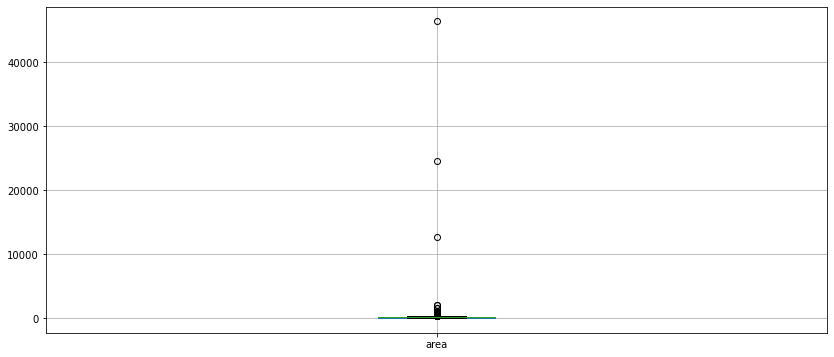

In [174]:
dataset.boxplot(['area'])

Atualmente a maior casa em questão de m² no mundo possui por volta de 9200 m², então, as áreas maiores do que esse valor podem ser removidas já que são dados errados que foram importados.

In [175]:
area_series = dataset['area']

<AxesSubplot:>

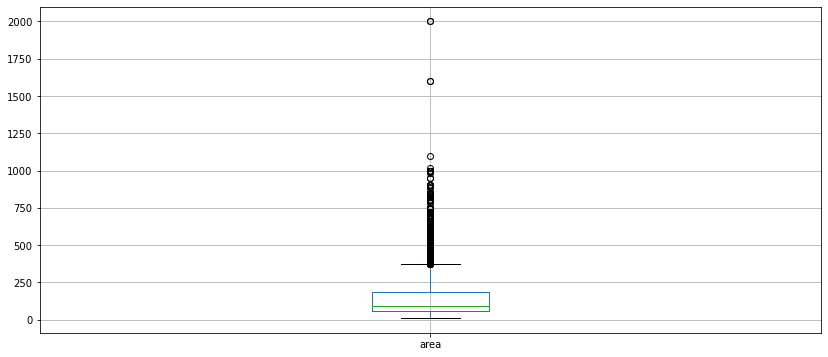

In [177]:
selecao_area = area_series < 10000
dataset = dataset[selecao_area]
dataset.boxplot('area')

#### Analizando a 'floor'

<AxesSubplot:>

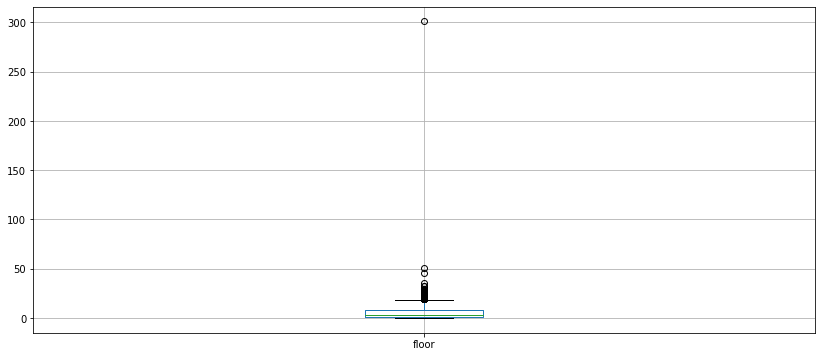

In [178]:
dataset.boxplot(['floor'])

Assim como a área, os número de andares possui dados inconsistentes. O prédio com o maior número de pavimentos (andares) no Brasil possui 77. Então, todos os valores acima deste foi importado errado.

In [179]:
floor_series = dataset['floor']

<AxesSubplot:>

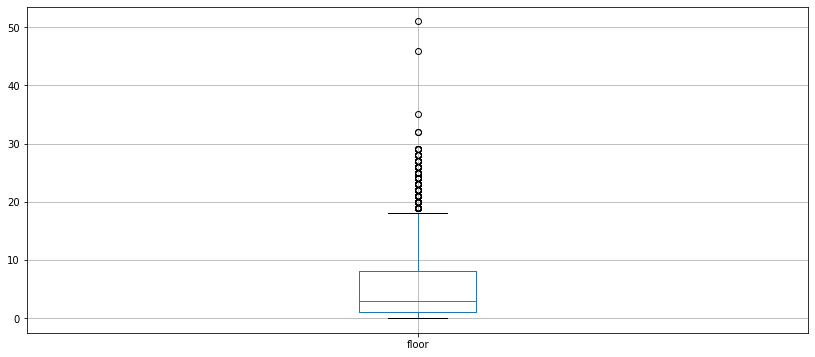

In [180]:
selecao_floor = floor_series <= 77
dataset = dataset[selecao_floor]
dataset.boxplot(['floor'])

#### Analizando a 'hoa'

<AxesSubplot:>

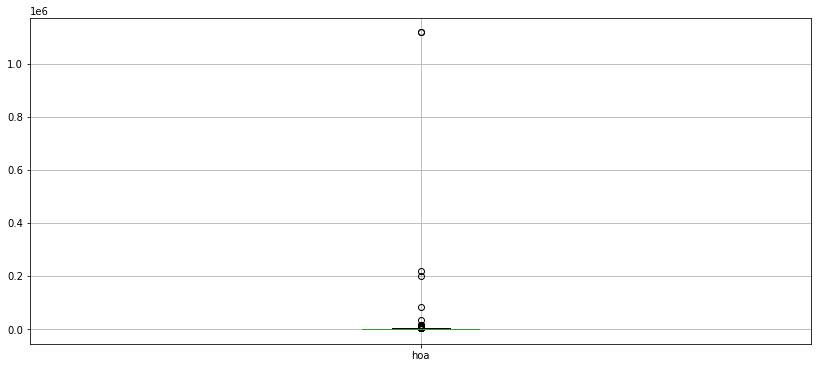

In [181]:
dataset.boxplot('hoa')

Retirando o valor acima de 1M de reais para visualizar melhor os dados de 'hoa'

In [182]:
hoa_series = dataset['hoa']

<AxesSubplot:>

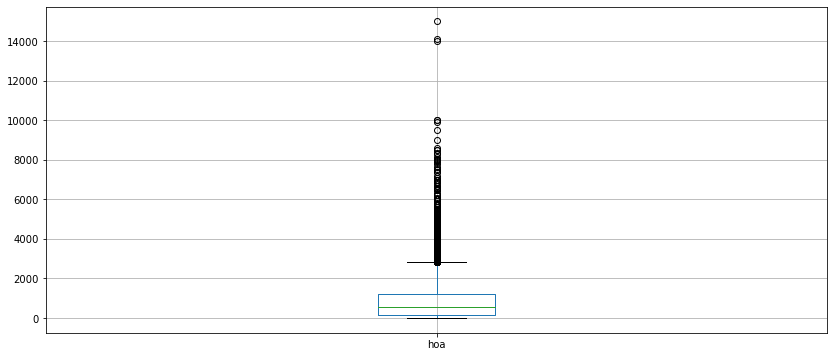

In [183]:
selecao_hoa = hoa_series < 25000
dataset = dataset[selecao_hoa]
dataset.boxplot('hoa')